## Degree Distribution Power Law

In [1]:
from collections import defaultdict

import powerlaw
import pandas as pd
from scipy import stats 
import numpy as np
import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = "/Users/mark/Dropbox/Math/Complex_Systems/research/wikipedia-network/paper/writeup/graphics/"
results_path = "/Users/mark/Desktop/wiki_v4/"


In [2]:
#load ndegree data

with open(results_path + 'direct_links.json', 'r') as fp:
    direct_links = json.load(fp)

dldf = pd.DataFrame(direct_links.items())
dldf.columns = ['article', 'direct links']

#add ndegree dataframe column
l = lambda x: len(x)
dldf['indegree'] = dldf['direct links'].map(l)

## Estimate Fit

In [3]:
powerlaw_fit_degree = powerlaw.Fit(dldf['indegree'], discrete=True)
print "alpha: ", powerlaw_fit_degree.alpha
print "gamma: ", 1 / powerlaw_fit_degree.alpha + 1
print "xmin: ", powerlaw_fit_degree.xmin
print "Kolmogorov Distance: ", powerlaw_fit_degree.D

Calculating best minimal value for power law fit


alpha:  2.43906928286
gamma:  1.40999245369
xmin:  5.0
Kolmogorov Distance:  0.00842867223018


In [10]:
print "xmax:", powerlaw_fit_degree.xmax

xmax: None


In [6]:
1/2.44 + 1

1.4098360655737705

# Visualize Fit

## Log-Log

In [4]:
dldf_sorted = dldf.sort_values(by='indegree', ascending=False)
dldf_sorted['rank'] = np.arange(1, dldf_sorted.shape[0]+1)


(-0.1, 100000.0)

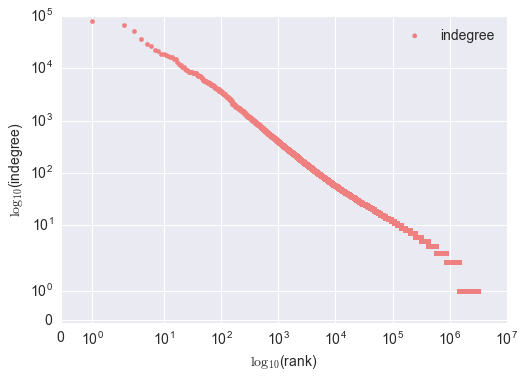

In [17]:
plt.scatter(dldf_sorted['rank'], dldf_sorted['indegree'], color="#F08080")
plt.xlabel("$\log_{10}$(rank)", fontsize=14)
plt.ylabel("$\log_{10}$(in-degree)", fontsize=14)
#make axis font size larger
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14)

#change axis labeling to 10^#
axis = plt.gca()

#symlog accomodates indegree of 0 
axis.set_yscale('symlog')
axis.set_xscale('symlog')

#restrict negative values for x and y-axes
plt.gca().set_xlim(left=0)
plt.gca().set_ylim(bottom=-.1)

## Plot againt Estimated Power Law 

In [7]:
from matplotlib.ticker import MaxNLocator

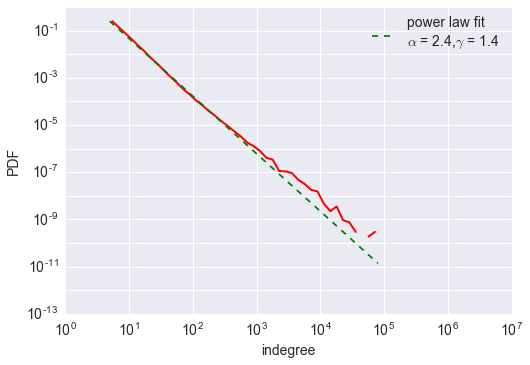

In [11]:
figCCDF = powerlaw_fit_degree.plot_pdf(color='r', linewidth=2)
powerlaw_fit_degree.power_law.plot_pdf(color='g', linestyle='--', ax=figCCDF, 
                                       label="power law fit\n"+ r'$\alpha$ = 2.4,' + r'$\gamma$ = 1.41')
plt.tick_params(axis='both', which='major', labelsize=14)


#fewer y-axis ticks
yticks = plt.gca().yaxis.get_major_ticks()
for i, y_l in enumerate(yticks):
    if i % 2 == 0:
        y_l.label1.set_visible(False)
    
#extend axis views
plt.gca().set_xlim(right=10**7)
plt.gca().set_ylim(bottom=10**(-13))


plt.ylabel("PDF", fontsize=14)
plt.xlabel("in-degree", fontsize=14)
plt.legend(numpoints=2, fontsize=14)

## Combined Plot

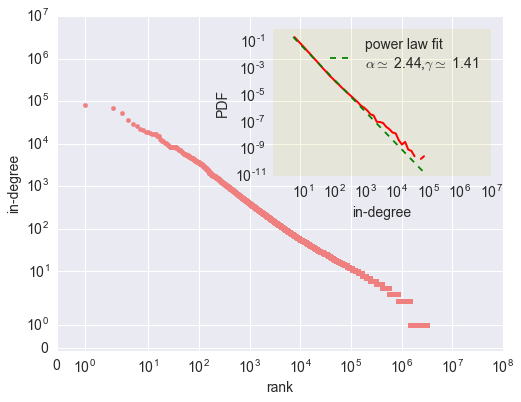

In [5]:
#defaults
sns.set()
plt.figure(figsize=(8,6))

plt.scatter(dldf_sorted['rank'], dldf_sorted['indegree'], color="#F08080", label=None)
plt.xlabel("rank", fontsize=14)
plt.ylabel("in-degree", fontsize=14)
#make axis font size larger
plt.tick_params(axis='both', which='major', labelsize=14)


#change axis labeling to 10^#
axis = plt.gca()
#symlog accomodates indegree of 0 
axis.set_yscale('symlog')
axis.set_xscale('symlog')

#restrict negative values for x and y-axes
plt.gca().set_xlim(left=0, right=10**8)
plt.gca().set_ylim(bottom=-.1, top=10**7)

sns.set_style("dark")
#subplot in top corner
a = plt.axes([.50, .53, .38, .34], axisbg='y')

figCCDF = powerlaw_fit_degree.plot_pdf(color='r', linewidth=2)
powerlaw_fit_degree.power_law.plot_pdf(color='g', linestyle='--', ax=figCCDF, 
                                       label="power law fit\n"+ r'$\alpha \simeq$ 2.44,' + r'$\gamma \simeq$ 1.41')

#axis labels and cutoff
plt.ylabel("PDF", fontsize=14)
plt.xlabel("in-degree", fontsize=14)
a.set_xlim(left=1.1, right=10**7)

#fewer y-axis ticks
yticks = plt.gca().yaxis.get_major_ticks()
for i, y_l in enumerate(yticks):
    if i % 2 == 0:
        y_l.label1.set_visible(False)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, loc=1, numpoints=2)

#transparent
a.patch.set_alpha(0.1)

#reset defaults
sns.set()

#save figure
plt.savefig(path+'ndegree_loglog.png', format='png', dpi=300, bbox_inches='tight')

## Compare against Alternative Distributions

* R is the log likelihood ratio
* p is the p-value based on a Kolmogorov-Smirnov Test

In [57]:
R, p = powerlaw_fit_degree.distribution_compare('power_law', 'lognormal')
print "R: ", R
print "p: ", p

R:  -6.30857104609
p:  0.363811230336


In [58]:
R, p = powerlaw_fit_degree.distribution_compare('power_law', 'exponential')
print "R: ", R
print "p: ", p

R:  250021.31546
p:  0.0


In [61]:
R, p = powerlaw_fit_degree.distribution_compare('power_law', 'stretched_exponential')
print "R: ", R
print "p: ", p

R:  36904.7776646
p:  3.93919872913e-50


In [59]:
R, p = powerlaw_fit_degree.distribution_compare('power_law', 'truncated_power_law')
print "R: ", R
print "p: ", p

R:  -26.2007368021
p:  4.52415882535e-13


Assuming nested distributions
